In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#входные данные
x = np.array([ [1, 1],
              [0, 1],
              [1, 0],
              [0, 0] ])

y = np.array([ [0],
              [1],
              [1],
              [0] ])

# x = np.loadtxt(r'C:\Users\kalinin\Desktop\iks.txt') #цифры в файле должны располагаться через пробел
# y = np.loadtxt(r'C:\Users\kalinin\Desktop\igrek.txt')

number_of_layers_and_neurons = [15, 20, 10] #слои и количество нейронов в каждом слое
learning_rate = 0.3
epoch = 10000
a_f = 1 #функция активации: 1 - сигмоида; 0 - гиперболический тангенс

In [11]:
try:
    i = (y.shape)[1]
except IndexError:
    y = y.reshape(((y.shape)[0], 1))

try:
    i = (x.shape)[1]
except IndexError:
    x = x.reshape(((x.shape)[0], 1))
    
# print(x.shape)
# print(y.shape)

ошибка модели:  0.00686405599452


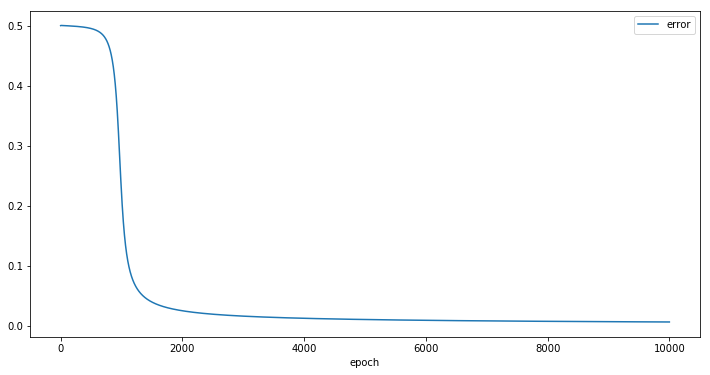

In [12]:
#инициализация весов
weights = []
bias = []

for i in range(len(number_of_layers_and_neurons)+1):
    #определение размерности матриц
    if i==0:
        first_dimension = ((x.shape)[1])
        second_dimension = number_of_layers_and_neurons[0]
    else:
        first_dimension = second_dimension
        if i==len(number_of_layers_and_neurons):
            second_dimension = ((y.shape)[1])
        else:
            second_dimension = number_of_layers_and_neurons[i]
    
    #создание матриц весов и заполнение их случайными величинами
    w = 2*np.random.random((first_dimension, second_dimension)) - 1
    b = 2*np.random.random((1, second_dimension)) - 1
    weights.append(w)
    bias.append(b)

#activation_function
def act_fun(arr, der, fun):
    if fun == 1:
        if der == 1:
            arr = 1 / (1+np.exp(-arr))
        else:
            arr = arr*(1-arr)
    elif fun == 0:
        if der == 1:
            arr = (np.exp(arr)-np.exp(-arr)) / (np.exp(arr)+np.exp(-arr))
        else:
            arr = 4 / (np.exp(arr)+np.exp(-arr))**2
    return arr

cost = []
for e in range(epoch):
    #the forward pass
    values = []
    values.append(x)

    for i in range(len(weights)):
        values.append(act_fun( np.dot(values[i], weights[i]) + bias[i], der=1, fun=a_f))

    #the backwars pass
    d_w = [] #delta_weights
    d_b = [] #delta_bias

    d_w.append( (values[len(values)-1] - y) * (act_fun(values[len(values)-1], der=0, fun=a_f)) )
    
    for t in range(len(weights)-1, 0, -1):
        d_w.insert(0, np.dot(d_w[0], weights[t].T) * (act_fun(values[t], der=0, fun=a_f)) )
        
    for t in range(len(d_w), 0, -1):
        d_b.insert( 0, np.dot( np.ones((1, (d_w[t-1].shape)[0])),  d_w[t-1]) )
    
    for t in range(len(d_w), 0, -1):
        d_w[t-1] = np.dot(values[t-1].T, d_w[t-1])
    
    #корректировка весов
    for t in range(len(weights)):
        weights[t] = weights[t] - learning_rate*d_w[t]
        bias[t] = bias[t] - learning_rate*d_b[t]
    
    cost.append(abs(values[len(values)-1] - y).mean())
    
print 'ошибка модели: ', abs(values[len(values)-1] - y).mean()
fig = plt.figure(figsize=(12,6))
plt.plot(cost, label = 'error')
plt.xlabel('epoch')
plt.legend()
plt.show()